## Background

in aviation industry, customers has rather low switching cost due to many options, promos, and availability. Maintaining passenger satisfaction is very important to retain their decision to use same airline. But there are many factors and details that affects customers satisfaction. This research will shed a light on which factors to prioritize

## Problem Statement

- **What factors are important to customer satisfaction?**
- **What factors our company is good at?**
- **What factors our company is terrible at?**

These important factors will be prioritized as company's focus to improve customer satisfaction. Effective and efficient improvement may result in higher satisfaction, lower cost and better service quality. This priority will greatly help company since time and resources are not always abundant. 

## Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('airline passanger satisfaction.csv')
df.drop(columns=['Unnamed: 0'],inplace= True)
pd.set_option('display.max_columns', 500)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


This dataset contains a survey from passengers satisfaction of their flight experience. There are 24 columns and 103,904 rows. The columns which are:

- ID : passenger unique ID
- Gender: passenger sex
- customer type: loyal or disloyal customer
- age: their age at time of flight
- Class: specific class they bought tickets foro
- Flight distance: the space between departure and arrival airport
- Inflight wifi service: passenger satisfaction for wifi quality
- Departure/Arrival time convenient: passenger satisfaction of flight schedule time convenience
- Ease of Online booking: passenger satisfaction of simplicity of buying tickets online
- Gate location: passenger satisfaction of gate location of departure
- food and drink: passenger satisfaction of food and drink quality
- Online boarding : passenger satisfaction of simplicity of boarding online
- Seat comfort: passenger satisfaction of seats comfortability
- Inflight entertainment: passenger satisfaction of flights entertainment quality (film, video, music, games etc)
- on-board service:passenger satisfaction of flight attendants
- Leg room Service: passenger satisfaction of leg space in their seats
- Baggage handling: passenger satisfaction of baggage handling
- Checkin service: passenger satisfaction of ease of check in before flight
- Cleanliness: passenger satisfaction of the plane's sanitation
- Departure delay in minutes: total delayed time of departure
- Arrival delay in minutes: total delayed time of arrival
- satisfaction: Passenger's experience of the flight

## Data Cleaning

### Checking duplicated data

there are no duplicated data

In [4]:
df[df.duplicated()]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


### Checking missing value

In [5]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

### Filling Missing Value

there are 310 missing values under arrival delay in minutes. based on the correlation tab, the missing value has very strong correlation with Departure Delay in Minutes. Therefore, we are going to fill in the missing values with median of arrival delay from data that has same values for departure delay

In [6]:
df.corr('spearman')['Arrival Delay in Minutes']

id                                  -0.004876
Age                                 -0.012439
Flight Distance                     -0.001468
Inflight wifi service               -0.036975
Departure/Arrival time convenient   -0.005580
Ease of Online booking              -0.013991
Gate location                        0.005384
Food and drink                      -0.032942
Online boarding                     -0.049770
Seat comfort                        -0.037115
Inflight entertainment              -0.044270
On-board service                    -0.047980
Leg room service                    -0.019995
Baggage handling                    -0.035180
Checkin service                     -0.034626
Inflight service                    -0.054823
Cleanliness                         -0.031428
Departure Delay in Minutes           0.740843
Arrival Delay in Minutes             1.000000
Name: Arrival Delay in Minutes, dtype: float64

In [7]:
mask = df[df['Arrival Delay in Minutes'].isna()]
mask

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,satisfied
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,3,2,3,3,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,3,3,3,3,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,1,5,1,3,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,1,5,4,5,5,1,5,5,5,3,5,0,NaN,satisfied


#### because we use median, the data must not be one only to get the median. Unfortunately, there is one value that do not have other data (455 min departure delay). We are going to fill in the arrival delay with the same number because we assume the plane flight duration remains normal so there would be no change in the arrival delay.

In [8]:
v = df[['Departure Delay in Minutes']].value_counts()[mask['Departure Delay in Minutes']]
v.sort_values()

Departure Delay in Minutes
455                               1
414                               2
217                               4
230                               5
271                               6
                              ...  
0                             58668
0                             58668
0                             58668
0                             58668
0                             58668
Length: 310, dtype: int64

In [9]:
df[df['Departure Delay in Minutes']==455]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
71557,29974,Male,Loyal Customer,50,Business travel,Business,95,1,3,3,3,4,1,3,4,3,4,4,3,2,3,455,NaN,neutral or dissatisfied


### Filling in the 455 Min Departure Delay

In [10]:
value_a = pd.Series({71557:455})

In [11]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(value_a)

In [12]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             309
satisfaction                           0
dtype: int64

### Filling in the remaining missing value

Saving missing values index for later use in fillna 

In [13]:
mask.reset_index(inplace=True)
index = mask['index']

Function to get each arrival delay median based on departure delay

In [14]:
def fungsi_mean_arrival_per_flight_destination(col):
    list_kosong = []
    a = 0
    for i in col:
        b = mask.loc[a,'Departure Delay in Minutes']
        c = round(df[df['Departure Delay in Minutes']==b ]['Arrival Delay in Minutes'].median())
        list_kosong.append(c)
        a+=1
    return pd.Series(list_kosong)

Filling in the missing value

In [15]:
x = fungsi_mean_arrival_per_flight_destination(mask['Arrival Delay in Minutes'])
x.set_axis(index,inplace= True)


In [16]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(x)

In [17]:
df.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Creating rating column

which is average for all passengers satisfaction (Inflight wifi service - cleanliness)
<br>
departure delay and arrival delay are not included since no delay (on time) should be the standard

In [18]:
df['rating'] = round(df.iloc[:,7:-4].mean(axis=1),1)

In [19]:
display(df.describe(), df.describe(include='object'))

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,rating
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.236805,3.237416
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.800967,0.659720
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.800000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,3.200000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,3.700000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,5.000000


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


### Replacing 0 within the satisfaction columns

some columns may have 0 value, this would not make sense since services were provided to all passengers.

We are going to replace the 0 values with:

- if the column is normally distributed, it would be replaced with mean
- otherwise, it would be replaced by median

In [20]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc.iloc[4:16]

C:\Users\yyogi\AppData\Local\Temp\ipykernel_7332\196033926.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Column Name,Number of Unique,Unique Sample
4,Type of Travel,2,"[Personal Travel, Business travel]"
5,Class,3,"[Eco Plus, Business, Eco]"
6,Flight Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 2075, 2486, 1174, 208, 752, 2139, 452, 719, 1561, 315, 3347, 2342, 819, 1043, 2611, 1192, 349, 883, 550, 302, 354, 1734, 1452, 296, 2882, 529, 1522, 612, 1454, 731, 2076, 309, 775, 861, 3334, 2496, 602, 446, 216, 3475, 646, 2501, 2227, 1426, 190, 1532, 157, 1506, 205, 895, 516, 909, 1435, 1190, 1259, 1670, 3960, 817, 406, 404, 500, 689, 3100, 525, 931, 304, 1896, 261, 347, 1042, 1773, 342, 297, 332, 2388, 748, 1080, 231, 551, 972, 265, 488, 1144, ...]"
7,Inflight wifi service,6,"[3, 2, 4, 1, 5, 0]"
8,Departure/Arrival time convenient,6,"[4, 2, 5, 3, 1, 0]"
9,Ease of Online booking,6,"[3, 2, 5, 4, 1, 0]"
10,Gate location,6,"[1, 3, 2, 5, 4, 0]"
11,Food and drink,6,"[5, 1, 2, 4, 3, 0]"
12,Online boarding,6,"[3, 5, 2, 1, 4, 0]"
13,Seat comfort,6,"[5, 1, 2, 3, 4, 0]"


**Normal Test**

In [21]:
from scipy.stats import kstest

- **H0: Data is normally distributed**

- **H1: Data is not normally distributed**
        
**If Pvalue < 0.05, we would reject H0 and accept H1**

In [22]:
for col in df.iloc[:,7:-2]:

    stats, pvalue = kstest(df[col], 'norm')
    print(f''' pvalue for {col} is {pvalue}''')


 pvalue for Inflight wifi service is 0.0
 pvalue for Departure/Arrival time convenient is 0.0
 pvalue for Ease of Online booking is 0.0
 pvalue for Gate location is 0.0
 pvalue for Food and drink is 0.0
 pvalue for Online boarding is 0.0
 pvalue for Seat comfort is 0.0
 pvalue for Inflight entertainment is 0.0
 pvalue for On-board service is 0.0
 pvalue for Leg room service is 0.0
 pvalue for Baggage handling is 0.0
 pvalue for Checkin service is 0.0
 pvalue for Inflight service is 0.0
 pvalue for Cleanliness is 0.0
 pvalue for Departure Delay in Minutes is 0.0
 pvalue for Arrival Delay in Minutes is 0.0


None of the columns are normally distributed, hence we are going to replace 0 with median of each columns. Except for Baggage Handling, since this is the only column without 0 value



In [23]:
df['Inflight wifi service'] = df['Inflight wifi service'].replace(0,df['Inflight wifi service'].median())
df['Departure/Arrival time convenient'] = df['Departure/Arrival time convenient'].replace(0,df['Departure/Arrival time convenient'].median())
df['Ease of Online booking'] = df['Ease of Online booking'].replace(0,df['Ease of Online booking'].median())
df['Gate location'] = df['Gate location'].replace(0,df['Gate location'].median())
df['Food and drink'] = df['Food and drink'].replace(0,df['Food and drink'].median())
df['Online boarding'] = df['Online boarding'].replace(0,df['Online boarding'].median())
df['Seat comfort'] = df['Seat comfort'].replace(0,df['Seat comfort'].median())
df['Inflight entertainment'] = df['Inflight entertainment'].replace(0,df['Inflight entertainment'].median())
df['On-board service'] = df['On-board service'].replace(0,df['On-board service'].median())
df['Leg room service'] = df['Leg room service'].replace(0,df['Leg room service'].median())
df['Checkin service'] = df['Checkin service'].replace(0,df['Checkin service'].median())
df['Inflight service'] = df['Inflight service'].replace(0,df['Inflight service'].median())
df['Cleanliness'] = df['Cleanliness'].replace(0,df['Cleanliness'].median())

In [24]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

C:\Users\yyogi\AppData\Local\Temp\ipykernel_7332\3657208298.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Column Name,Number of Unique,Unique Sample
0,id,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 82113, 96462, 79485, 65725, 34991, 51412, 98628, 83502, 95789, 100580, 71142, 127461, 70354, 66246, 39076, 22434, 43510, 114090, 105420, 102956, 18510, 14925, 118319, 75460, 48492, 27809, 70594, 30089, 58779, 79659, 110293, 48014, 96517, 64685, 64138, 60373, 14849, 28319, 103012, 124114, 107794, 81983, 53164, 82042, 72127, 113046, 1050, 54886, 125918, 7467, 78972, 126625, 114501, 114813, 32167, 68001, 117052, 8661, 57165, 78610, 51058, 92027, 115534, 9261, 61033, 75930, 112142, 24518, 112524, 101639, 85018, 106922, 32564, 92242, 73302, 42267, 121358, 65655, 88062, 91330, 22031, 27921, 51947, 40017, 76392, 118486, 6012, 30183, 41652, 15138, 123589, 114534, 93076, 96963, ...]"
1,Gender,2,"[Male, Female]"
2,Customer Type,2,"[Loyal Customer, disloyal Customer]"
3,Age,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16, 11, 62, 8, 56, 68, 55, 18, 65, 72, 70, 63, 10, 7, 14, 80, 74, 71, 85, 73, 76, 77, 75, 79, 78]"
4,Type of Travel,2,"[Personal Travel, Business travel]"
5,Class,3,"[Eco Plus, Business, Eco]"
6,Flight Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 2075, 2486, 1174, 208, 752, 2139, 452, 719, 1561, 315, 3347, 2342, 819, 1043, 2611, 1192, 349, 883, 550, 302, 354, 1734, 1452, 296, 2882, 529, 1522, 612, 1454, 731, 2076, 309, 775, 861, 3334, 2496, 602, 446, 216, 3475, 646, 2501, 2227, 1426, 190, 1532, 157, 1506, 205, 895, 516, 909, 1435, 1190, 1259, 1670, 3960, 817, 406, 404, 500, 689, 3100, 525, 931, 304, 1896, 261, 347, 1042, 1773, 342, 297, 332, 2388, 748, 1080, 231, 551, 972, 265, 488, 1144, ...]"
7,Inflight wifi service,5,"[3, 2, 4, 1, 5]"
8,Departure/Arrival time convenient,5,"[4, 2, 5, 3, 1]"
9,Ease of Online booking,5,"[3, 2, 5, 4, 1]"


In [25]:
len(df)

103904

### Review Data Cleaning:

- We have total 103,904 data, consisting of 25 variables
- There were 310 missing values in Arrival delay. We filled in the missing values with median from flights that has same departure delay. We choose departure delay because it has strong correlation with Arrival Delay
- Create rating column. Rating is the average of customer's satisfaction 

## Exploratory Data Analysis

### Gender, Customer Type, Type of Travel, Class, and Satisfaction Percentage Analysis (categorical data)

Text(0.5, 0.98, 'Categorical Analysis')

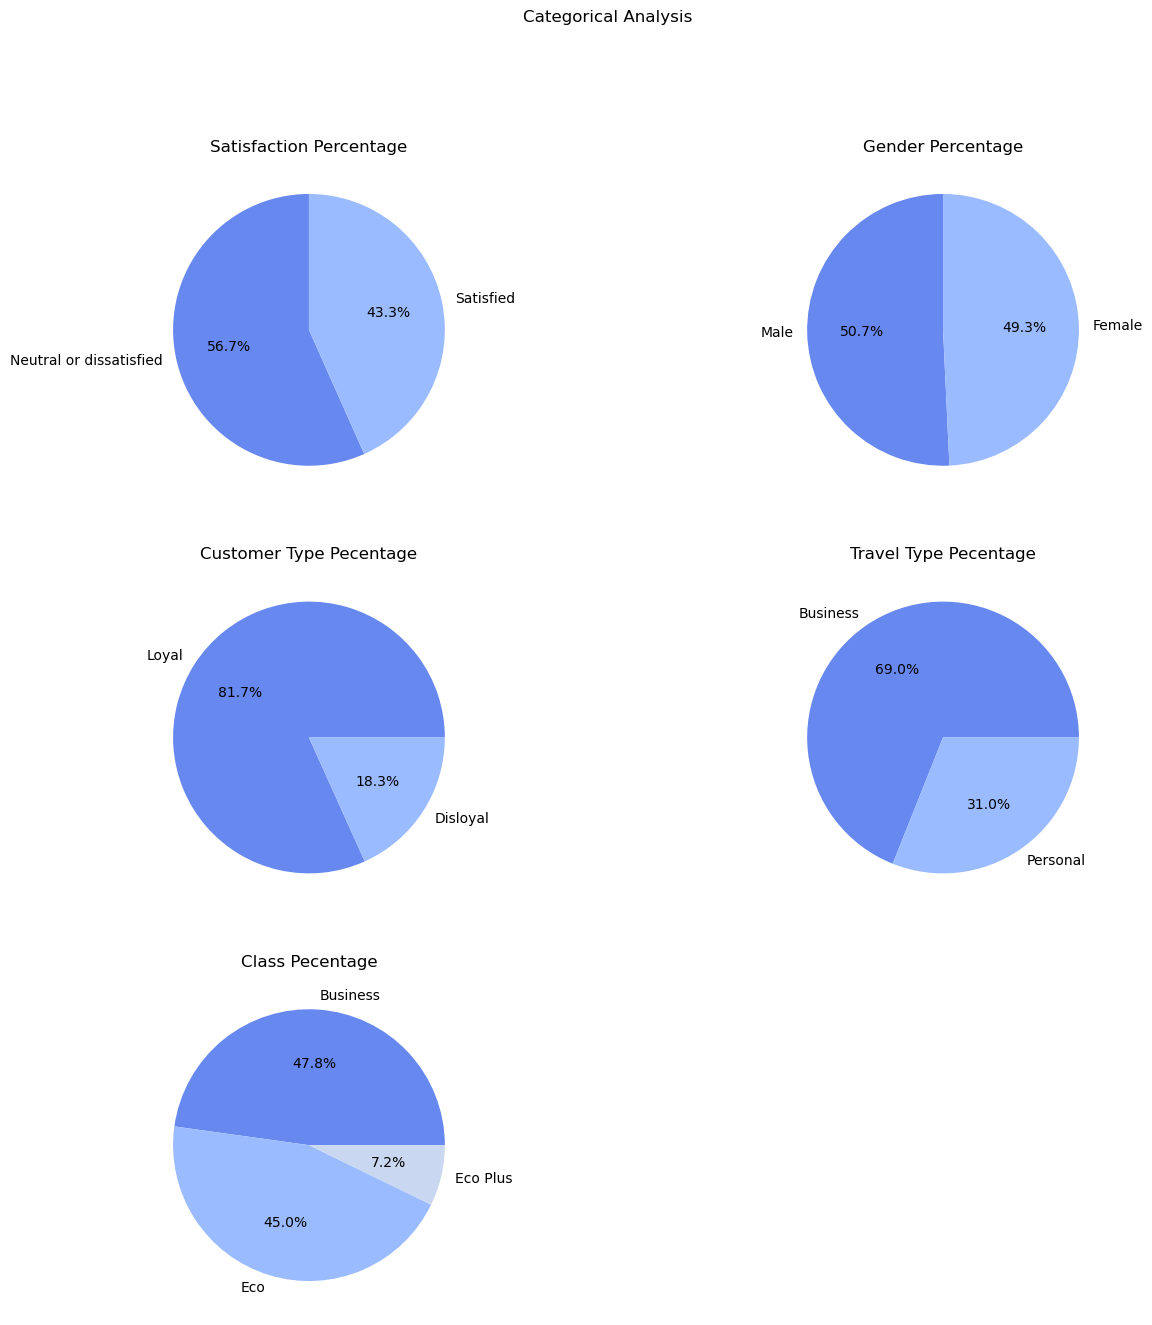

In [26]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("coolwarm"), autopct = '%1.1f%%',startangle = 90)
pass
plt.title('Satisfaction Percentage')

plt.subplot(3,2,2)
plt.pie(df.Gender.value_counts(), labels = ["Male", "Female"], colors = sns.color_palette("coolwarm"), autopct = '%1.1f%%',startangle = 90)
pass
plt.title('Gender Percentage')

plt.subplot(3,2,3)
plt.pie(df['Customer Type'].value_counts(), labels = ["Loyal", "Disloyal"], colors = sns.color_palette("coolwarm"), autopct = '%1.1f%%')
pass
plt.title('Customer Type Pecentage')

plt.subplot(3,2,4)
plt.pie(df['Type of Travel'].value_counts(), labels = ["Business", "Personal"], colors = sns.color_palette("coolwarm"), autopct = '%1.1f%%')
pass
plt.title('Travel Type Pecentage')

plt.subplot(3,2,5)
plt.pie(df['Class'].value_counts(), labels = ["Business", "Eco", 'Eco Plus'], colors = sns.color_palette("coolwarm"), autopct = '%1.1f%%')
pass
plt.title('Class Pecentage')

plt.suptitle('Categorical Analysis')

**Satisfaction Chart:**

- 53.7% of our passengers are neutral or dissatisfied. They would be less likely to use our services again.
Giving discounts or promo may encourage them again to use our services

- 43.3% of our passengers are satisfied. Targeting frequent flyer miles would be much more likely to them.

**Gender Percentage:**

- Male and Female are evenly distributed. Our aircraft has no particular distinction to males and females

**Customer Type Percentage:**

- 81.7% of our passengers are loyal customers, meaning this is not their first flight. But high number of dissatisfaction may discourage them again
- 18.3% of our passengers are disloyal, which this may mean using our service for their first and last time. Giving promos or discounts may encourage them again.

**Travel Type Percentage:**

- 31% are travelling for personal reasons. This includes holidays, and visiting loved ones. inflight services may be important to them since travelling with families and friends are prone to help for some reason.
- 69% are travelling for business reasons. This includes meetings, surveys etc. Providing wifi may be critical as they would like to do their job on flights.

**Class Percentage:**

- 47.8% of passengers used Business Class
- 45% of passengers used Eco class
- 7.2% of passengers used Eco Plus. Eco Plus class may need to be under review since it contributes little to our revenue

### Passengers per Satisfied and Neutral or Dissatisfied

<Figure size 800x500 with 0 Axes>

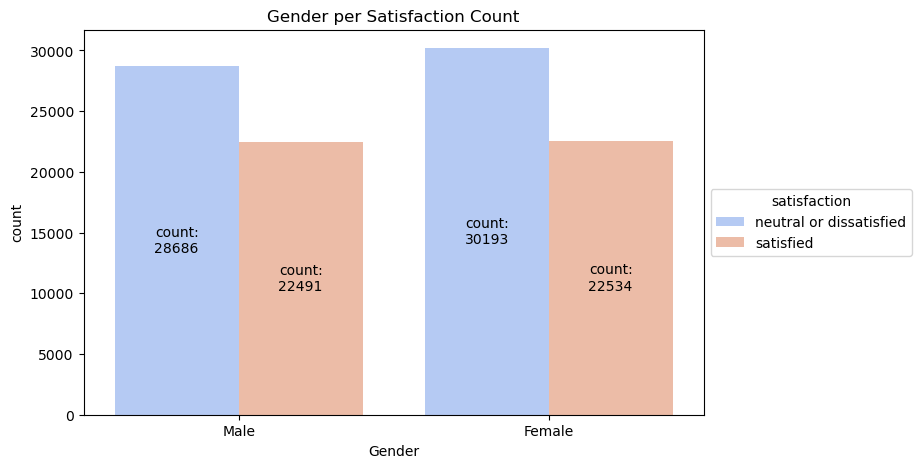

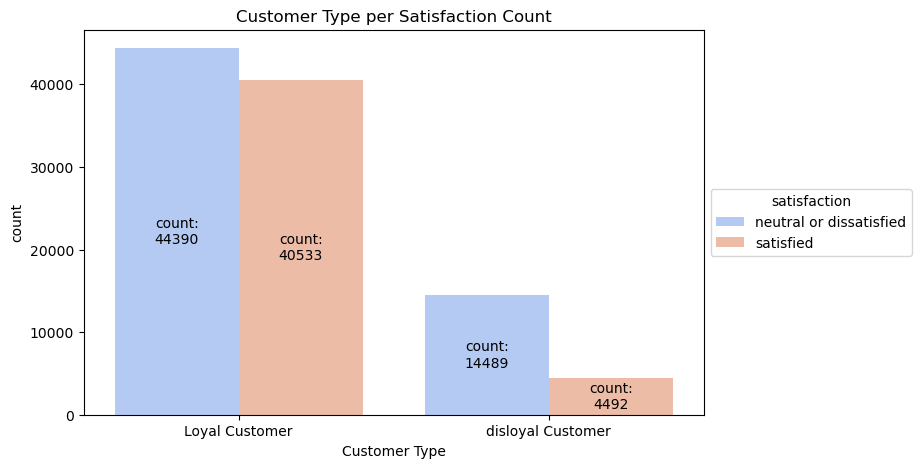

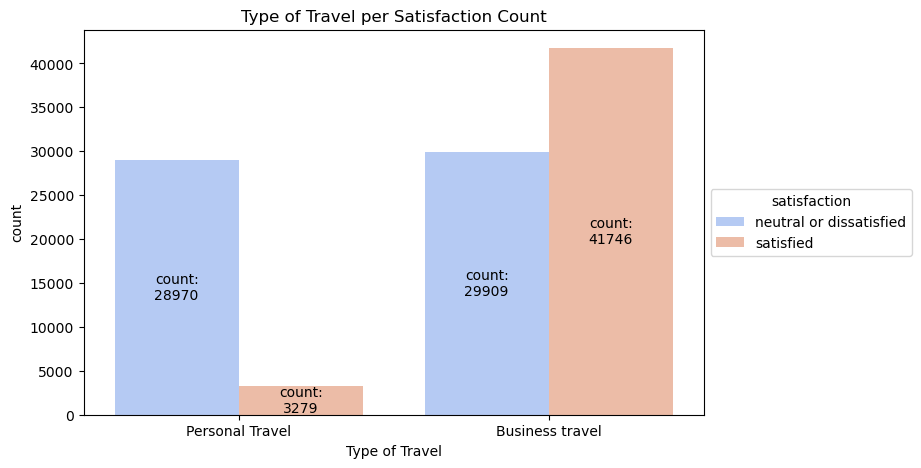

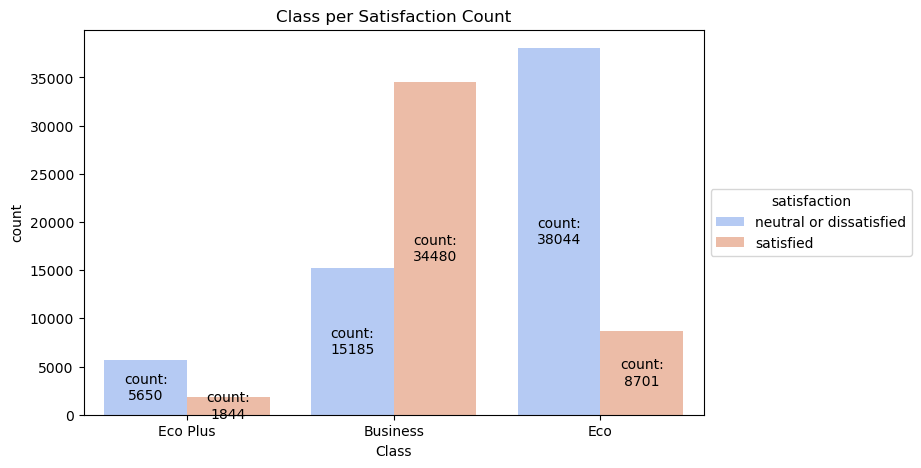

In [27]:
plt.figure(figsize = (8,5))
for col in df.drop(columns='Age').iloc[:,1:5]:
    plt.figure(figsize = (8,5))

    ax = sns.countplot(x =col, data = df, hue ="satisfaction", palette ="coolwarm" )
    for container in ax.containers:
        ax.bar_label(container, fmt='count:\n%.f', label_type='center')


    # format graph
    plt.title(f"{col} per Satisfaction Count")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

    plt.show()

**Interpretation:**

- Gender is evenly distributed on neutral or dissatisfied and satisfied
- 52.5% of loyal customers felt neutral or dissatisfied. This may discourage them to fly with us again
- Interestingly, those who travel for personal reasons has very high percentage of neutral or dissatisfied.
- Most of satisfied passengers flew in business class. There are steep difference of satisfaction in Eco Plus and Eco class

### Flight Lateness Analysis

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

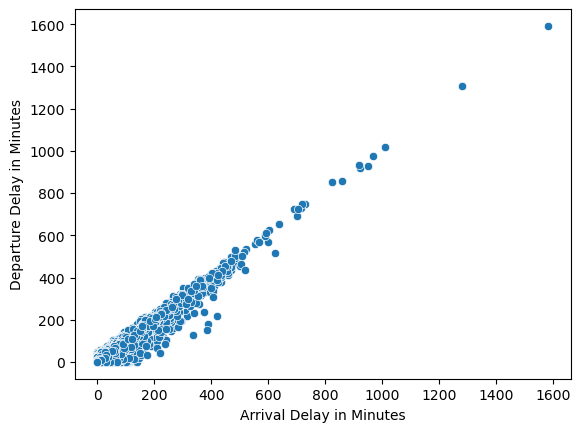

In [28]:
sns.scatterplot(data=df,x='Arrival Delay in Minutes',y='Departure Delay in Minutes')

**Highlights:**

- tidak ada outlier
- berkorelasi kuat

''

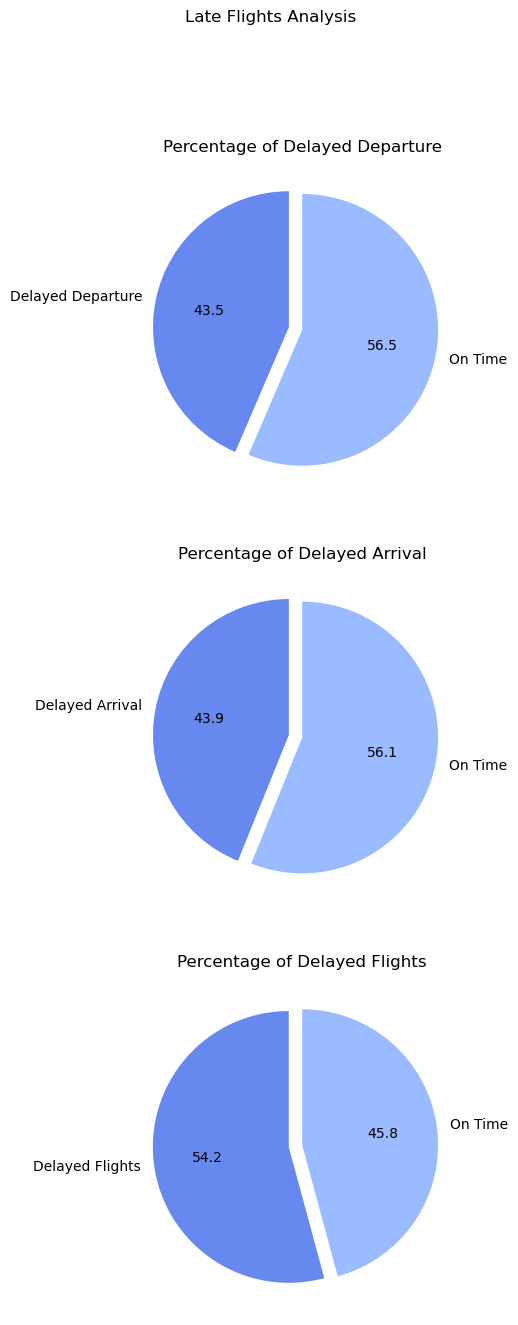

In [29]:
plt.figure(figsize=(25,15))
plt.suptitle('Late Flights Analysis')


df_late_departure = pd.DataFrame()
df_late_departure['Frequency'] = [np.count_nonzero(df['Departure Delay in Minutes']),len(df['Departure Delay in Minutes']) - np.count_nonzero(df['Departure Delay in Minutes'])]
df_late_departure['Percentage'] = df_late_departure['Frequency'] / df_late_departure['Frequency'].sum()*100
df_late_departure

plt.subplot(3,1,1)
plt.pie(
    x=df_late_departure['Percentage'],
    labels=['Delayed Departure','On Time'],
    autopct= f'%.1f',
    explode= (0.1,0),
    startangle=90,
    colors = sns.color_palette("coolwarm")
)
plt.title('Percentage of Delayed Departure')

df_late_arrival = pd.DataFrame()
df_late_arrival['Frequency'] = [np.count_nonzero(df['Arrival Delay in Minutes']),len(df['Arrival Delay in Minutes']) - np.count_nonzero(df['Arrival Delay in Minutes'])]
df_late_arrival['Percentage'] = df_late_arrival['Frequency'] / df_late_arrival['Frequency'].sum()*100
df_late_arrival

plt.subplot(3,1,2)
plt.pie(
    x=df_late_arrival['Percentage'],
    labels=['Delayed Arrival','On Time'],
    autopct= f'%.1f',
    explode= (0.1,0),
    startangle=90,
    colors = sns.color_palette("coolwarm")
)

plt.title('Percentage of Delayed Arrival')

df_dummy = pd.DataFrame()
df_dummy['total late minutes'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']


df_late_all = pd.DataFrame()
df_late_all['Frequency'] = [np.count_nonzero(df_dummy['total late minutes']),len(df_dummy['total late minutes']) - np.count_nonzero(df_dummy['total late minutes'])]
df_late_all['Percentage'] = df_late_all['Frequency'] / df_late_all['Frequency'].sum()*100
df_late_all

plt.subplot(3,1,3)
plt.pie(
    x=df_late_all['Percentage'],
    labels=['Delayed Flights','On Time'],
    autopct= f'%.1f',
    explode= (0.1,0),
    startangle=90,
    colors = sns.color_palette("coolwarm")
)

plt.title('Percentage of Delayed Flights')

;


**Delayed Departure Chart:**

- 43.5% of departing flights are delayed. Which mean passengers were waiting more than the time set earlier. Further investigation is required for the cause, weather, technical issues may contributes.

- 56.5% of our on time. The plane left as the time agreed upon.

**Delayed Arrival Chart:**

- 43.9% did not arrive on time. This may be caused by departure lateness, or weather during flights, or airport hangar traffic.
- the arrival on time percentage has similar figure from departure on time chart. This may mean the biggest cause for delayed arrival is delayed departure.

**All Delayed Flights Percentage:**

- 54.2% of all our flights are delayed. From departure or arrival or both.
- This raises further needs for investigation of our operational. Since passengers are looking for reliable airways.


In [30]:
df_dummy['total late minutes'].sum()/np.count_nonzero(df_dummy['total late minutes'])

55.43444762023114

In [31]:
df_average_late =  pd.DataFrame({
    'Departure Delay Duration in Minutes': [df['Departure Delay in Minutes'].sum()/np.count_nonzero(df['Departure Delay in Minutes'])],
    'Arrival Delay Duration in Minutes': [df['Arrival Delay in Minutes'].sum()/np.count_nonzero(df['Arrival Delay in Minutes'])],
    'Total Average Duration Delay in Minutes': [df_dummy['total late minutes'].sum()/np.count_nonzero(df_dummy['total late minutes'])]
})
df_average_late = df_average_late.transpose().reset_index()
df_average_late

,index,0
0,Departure Delay Duration in Minutes,34.030462
1,Arrival Delay Duration in Minutes,34.721576
2,Total Average Duration Delay in Minutes,55.434448


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


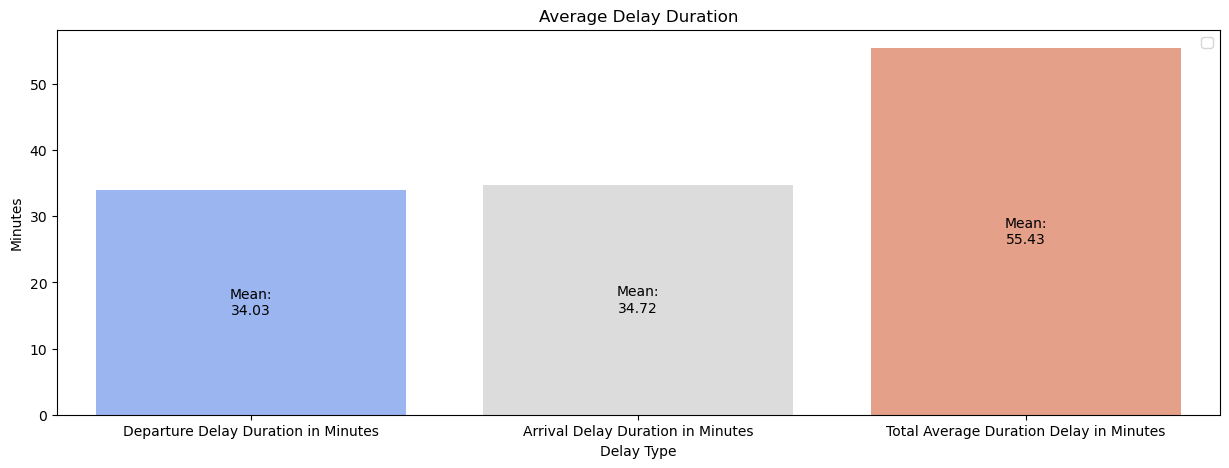

In [32]:
plt.figure(figsize=(15,5))


ax = sns.barplot(data=df_average_late,x= 'index',y= 0,color = 'lightblue',palette='coolwarm')
ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')

plt.title('Average Delay Duration')
plt.ylabel('Minutes')
plt.xlabel('Delay Type')
plt.legend()
plt.show();

**Highlights:**

- on average, flights are delayed by 30 minutes. Further investigation is required to analyze root cause and possible solutions
- We may have to hand out amenities as compensations

### Delay per Satisfaction

We are going to breakdown delays into satisfied and dissatisfied group. To see if there is any difference or pattern. Previously we have tested that departure and arrival delay are not normally distributed. Hence,we are going to use mann whitney test to prove the difference.

- H0: mean departure delay dissatisfied group = mean departure delay satisfied group
- H1: mean departure delay dissatisfied group != mean departure delay satisfied group
<br><br>
- H0: mean arrival delay dissatisfied group = mean arrival delay satisfied group
- H1: mean arrival delay dissatisfied group != mean arrival delay satisfied group

In [33]:
a = df[df['Departure Delay in Minutes']>0]
b = df[df['Arrival Delay in Minutes']>0]

Text(0.5, 0.98, 'Delay duration per satisfaction Average')

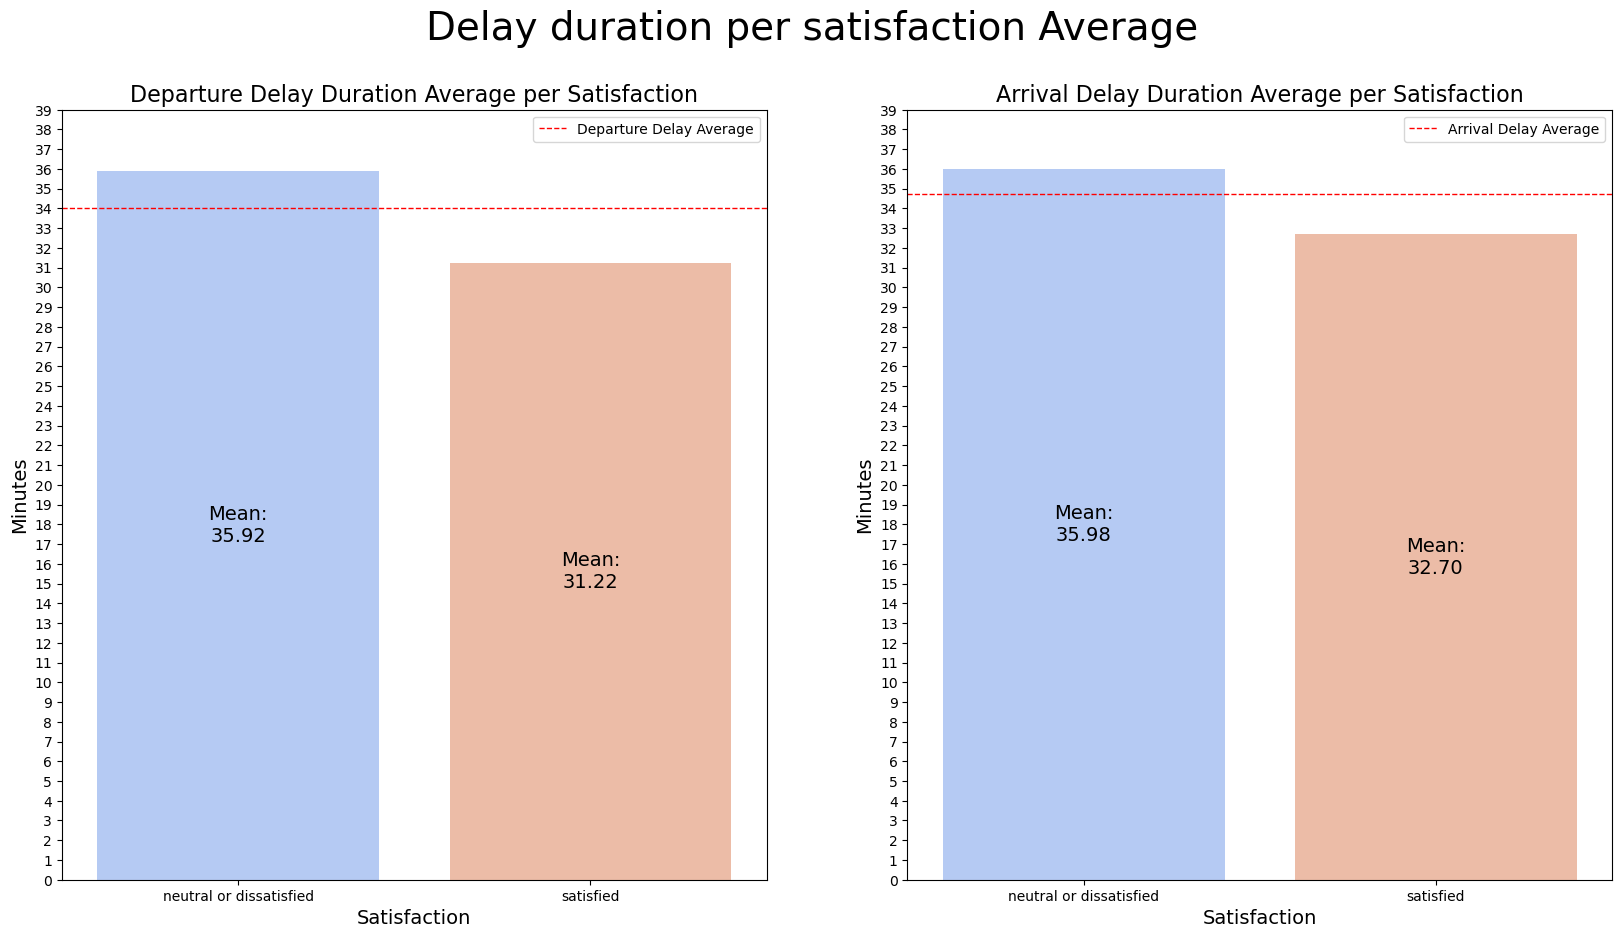

In [34]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
ax = sns.barplot(data = a, x= 'satisfaction',y='Departure Delay in Minutes',estimator=np.mean,palette='coolwarm',ci=0)
ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center',fontsize=14)
plt.axhline(y=a['Departure Delay in Minutes'].mean(), color='red', linestyle='--', linewidth=1, label='Departure Delay Average')
plt.yticks(range(0,40,1))

plt.title(f'Departure Delay Duration Average per Satisfaction',fontsize=16)
plt.ylabel('Minutes',fontsize=14)
plt.xlabel('Satisfaction',fontsize=14)
plt.legend()

plt.subplot(1,2,2)
ax = sns.barplot(data = b, x= 'satisfaction',y='Arrival Delay in Minutes',estimator=np.mean,palette='coolwarm',ci=0)
ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center',fontsize=14)
plt.axhline(y=b['Arrival Delay in Minutes'].mean(), color='red', linestyle='--', linewidth=1, label='Arrival Delay Average')
plt.yticks(range(0,40,1))

plt.title(f'Arrival Delay Duration Average per Satisfaction',fontsize=16)
plt.ylabel('Minutes',fontsize=14)
plt.xlabel('Satisfaction',fontsize=14)
plt.legend()

plt.suptitle('Delay duration per satisfaction Average',fontsize=28)

In [35]:
import scipy.stats as stats


In [36]:
a = df[(df['Departure Delay in Minutes']>0) & (df['satisfaction']=='satisfied')]
b = df[(df['Departure Delay in Minutes']>0) & (df['satisfaction']=='neutral or dissatisfied')]
c = df[(df['Arrival Delay in Minutes']>0) & (df['satisfaction']=='satisfied')]
d = df[(df['Arrival Delay in Minutes']>0) & (df['satisfaction']=='neutral or dissatisfied')]

In [37]:
stat, pvalue = stats.mannwhitneyu(a['Departure Delay in Minutes'],b['Departure Delay in Minutes'],alternative= 'two-sided')
if pvalue > 0.05:
    print(f'''
    Pvalue = {pvalue}. Pvalue > 0.05. Gagal menolak Ho.
    We dont have enough evidence to say mean departure delay duration dissatisfied group = mean departure delay duration satisfied group
    (Proporsinya TIDAK berbeda signifikan)
    ''')

else:
    print(f'''
    Pvalue = {pvalue}. Pvalue <= 0.05. Berhasil menolak Ho.
    We  have enough evidence to say mean departure delay duration dissatisfied group != mean departure delay duration satisfied group
    (Proporsinya  berbeda signifikan)
    ''') 

stat, pvalue = stats.mannwhitneyu(c['Departure Delay in Minutes'],d['Departure Delay in Minutes'],alternative= 'two-sided')
if pvalue > 0.05:
    print(f'''
    Pvalue = {pvalue}. Pvalue > 0.05. Gagal menolak Ho.
    We dont have enough evidence to say mean Arrival delay duration dissatisfied group = mean departure delay duration satisfied group
    (Proporsinya TIDAK berbeda signifikan)
    ''')

else:
    print(f'''
    Pvalue = {pvalue}. Pvalue <= 0.05. Berhasil menolak Ho.
    We have enough evidence to say mean Arrival delay duration dissatisfied group != mean departure delay duration satisfied group
    (Proporsinya  berbeda signifikan)
    ''') 



    Pvalue = 6.971019169166994e-55. Pvalue <= 0.05. Berhasil menolak Ho.
    We  have enough evidence to say mean departure delay duration dissatisfied group != mean departure delay duration satisfied group
    (Proporsinya  berbeda signifikan)
    

    Pvalue = 7.405038456080603e-18. Pvalue <= 0.05. Berhasil menolak Ho.
    We have enough evidence to say mean Arrival delay duration dissatisfied group != mean departure delay duration satisfied group
    (Proporsinya  berbeda signifikan)
    


**Highlights"**

-  The United States Federal Aviation Administration (FAA) considers a flight to be delayed when it is 15 minutes later than its scheduled time. The dissatisfied group delay time is more than 15 minutes.
- There are significant difference of delay in the satisfied and dissatisfied group. Which means delayed flight would lead to dissatisfaction
- Arrival delay is likely caused by departure delay. Solving departure delay problems will also solve arrival delay.

## Satisfaction Factors

### Correlation 

Correlation is looking for the ratings's connectedness to each other. Some factor may also be as important as another factor.

The data is not normally distributed for each factors. Hence, Spearman is appropriate for correlation.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


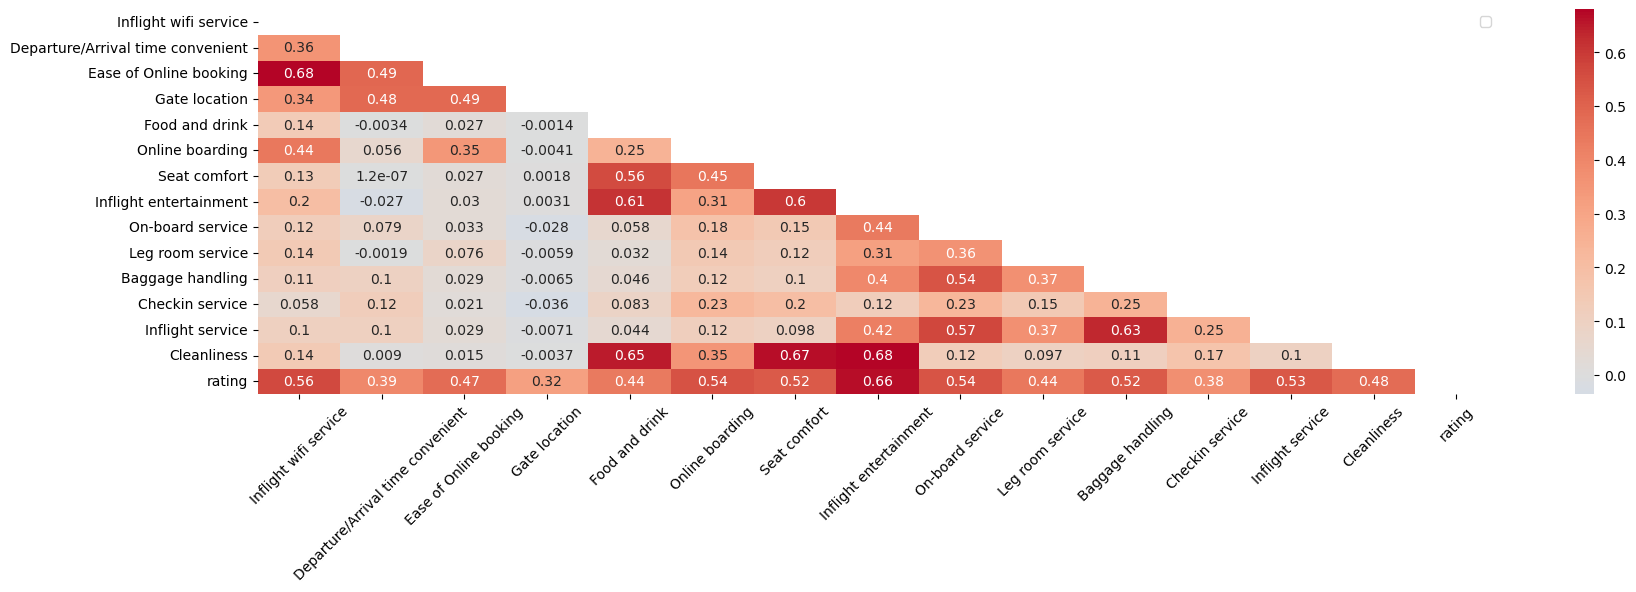

In [38]:
df_1 = df.drop(columns=['Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes','id','Age'])
matrix = np.triu(df_1.corr(method='spearman'))
plt.figure(figsize = (20,5))

sns.heatmap(data=df_1.corr(method='spearman'),annot=True,cmap='coolwarm',center=0,mask= matrix)
plt.xticks(rotation=45)
plt.legend()

**Highlights:**

- Inflight wifi service has strong relationship with ease of online booking. Tech-savvy people would like to stay online all the time.

- Cleanliness has strong relationship with Food and Drink. This makes sense since food hygiene is very imporant.

- Inflight entertainment has strong relationship with Food and Drink. Passengers would like to consume food while watching movies/listening to music.

- Seat comfort has strong relationship with inflight entertainment. This is important since enjoying entertainment is better in comfort.

- Seat comfort has strong relationship with cleanliness. This makes sense because a comfortable seat is also a clean seat.

- Baggage handling has strong relationship with inflight services. Passengers may consider flight attendant helping baggage as a great inflight services.

- Gate location has the lowest relationship with rating. Since gate location is managed by airports and no major difference to different gates locations

### Chi Square

To see if satisfied and dissatisfied passengers has relationship with each factors. If there is no significant relationship, we can assume the factor is not significant to passenger's satisfaction.

- H0: Satisfaction is independent to factor
- H1: satisfaction is not independent to factor

In [39]:
from scipy.stats import chi2_contingency

In [40]:
for col in df.iloc[:,7:-4]:
    b = df[[col,'satisfaction']]

    c = b.pivot_table(
        index = col,
        columns= 'satisfaction',
        values='satisfaction',
        aggfunc= len
    )

    stat, pvalue, dof, expexted = chi2_contingency(c)
    print(f'{pvalue} is pvalue for {col}')

0.0 is pvalue for Inflight wifi service
2.56192251119798e-91 is pvalue for Departure/Arrival time convenient
0.0 is pvalue for Ease of Online booking
0.0 is pvalue for Gate location
0.0 is pvalue for Food and drink
0.0 is pvalue for Online boarding
0.0 is pvalue for Seat comfort
0.0 is pvalue for Inflight entertainment
0.0 is pvalue for On-board service
0.0 is pvalue for Leg room service
0.0 is pvalue for Baggage handling
0.0 is pvalue for Checkin service
0.0 is pvalue for Inflight service
0.0 is pvalue for Cleanliness


**Interpretation:**

- All factors are significant towards passenger's satisfaction  

### Satisfaction Factors

We know that satisfied passengers rate higher than neutral or dissatisfied passengers. So we are going to analyze further about the relationships using Mann-Whitney test since none of the factors are distributed normally.

- H0: mean neutral or dissatisfied passengers = mean factor satisfied passengers
- H1: mean neutral or dissatisfeid passengers != mean satisfied passengers

In [41]:
df.groupby(by='satisfaction').mean().drop(columns=['id','Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'])

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,rating
satisfaction,,,,,,,,,,,,,,,
neutral or dissatisfied,2.400041,3.270759,2.623635,2.976121,2.960954,2.711001,3.036363,2.895107,3.019362,3.011600,3.375991,3.043003,3.389018,2.936735,2.954964
satisfied,3.367507,3.138212,3.230139,2.977946,3.524642,4.117490,3.966530,3.964931,3.857324,3.836891,3.966396,3.646041,3.969461,3.744342,3.606778


In [42]:
import scipy.stats as stats


In [43]:
df_satisfied = df[df['satisfaction'] == 'satisfied']

df_dissatisfied = df[df['satisfaction'] == 'neutral or dissatisfied']

for col in df.iloc[:,7:-4]:

    stat, pvalue = stats.mannwhitneyu(df_satisfied[col],df_dissatisfied[col],alternative= 'greater')
    print(f''' pvalue for {col} is {pvalue}''')

 pvalue for Inflight wifi service is 0.0
 pvalue for Departure/Arrival time convenient is 1.0
 pvalue for Ease of Online booking is 0.0
 pvalue for Gate location is 0.5152230299367779
 pvalue for Food and drink is 0.0
 pvalue for Online boarding is 0.0
 pvalue for Seat comfort is 0.0
 pvalue for Inflight entertainment is 0.0
 pvalue for On-board service is 0.0
 pvalue for Leg room service is 0.0
 pvalue for Baggage handling is 0.0
 pvalue for Checkin service is 0.0
 pvalue for Inflight service is 0.0
 pvalue for Cleanliness is 0.0


**Interpretation:**

- Gate location there is no statistically significant difference. Which may mean passengers were indefferent towards gate locations.
- Departure/Arrival time convenient factor is very interesting because the neutral or dissatisfied passengers rate higher than satisfied passengers on this factor. Further study is needed to shed a light on this clue.
- Departure and Arrival delay there is no statistically significant difference. May be caused by delays were happening to half of our flights.
- All remaining factors have statistically significant difference. Which means both satisfied and dissatisfied passengers get different treatment from our services.

### Satisfaction Factors Barplot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

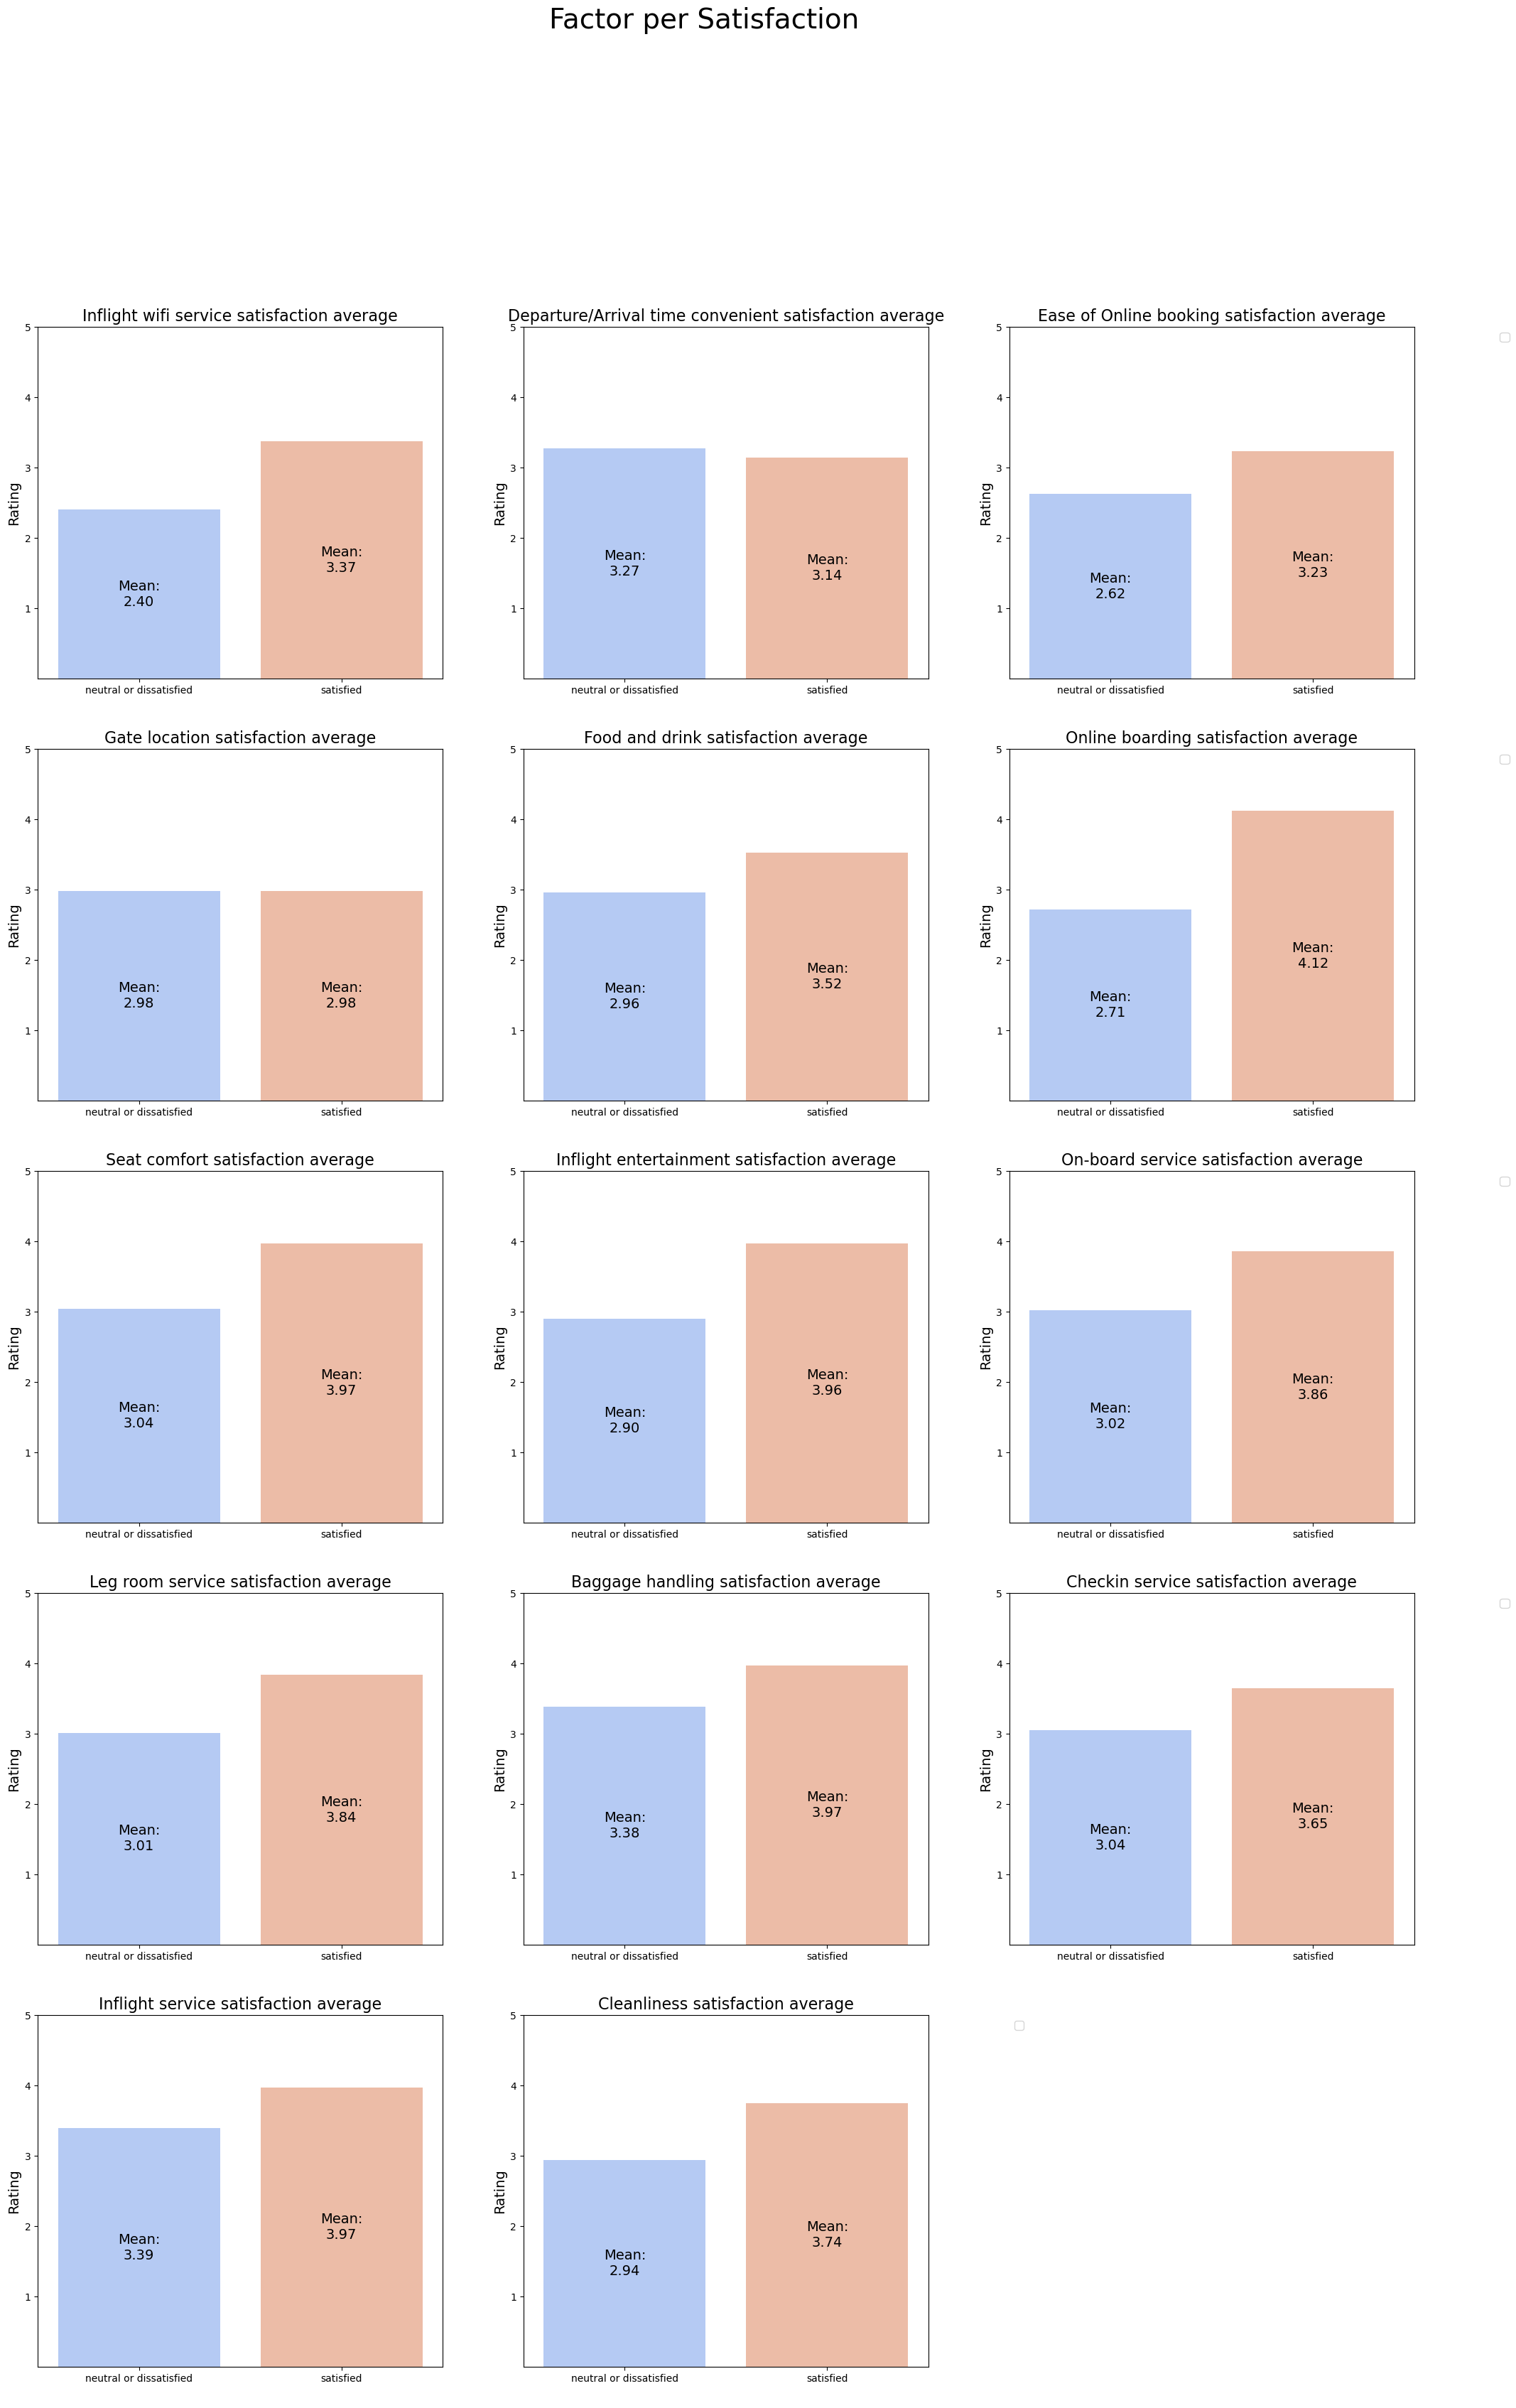

In [44]:
plt.figure(figsize=(25,45))

z = 1
for col in df.iloc[:,7:-4]:


    plt.subplot(6,3,z)
    ax = sns.barplot(data = df.groupby('satisfaction').mean().reset_index(), x= 'satisfaction',y=col,palette='coolwarm')
    ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center',fontsize=14)

    plt.title(f'{col} satisfaction average',fontsize=16)
    plt.ylabel('Rating',fontsize=14)
    plt.yticks(range(1,6))
    plt.xlabel(' ',fontsize=14)
    plt.legend(loc=1,bbox_to_anchor=(1.25,1),fontsize=12)
    z += 1

plt.suptitle('Factor per Satisfaction',fontsize=28)

plt.show();


In [45]:
z= df.drop(columns=['Arrival Delay in Minutes','Departure Delay in Minutes','id','Flight Distance','Age']).groupby('satisfaction').mean().transpose()

z['diff'] = z['satisfied'] - z['neutral or dissatisfied']
z.sort_values(by='diff')

satisfaction,neutral or dissatisfied,satisfied,diff
Departure/Arrival time convenient,3.270759,3.138212,-0.132547
Gate location,2.976121,2.977946,0.001825
Food and drink,2.960954,3.524642,0.563688
Inflight service,3.389018,3.969461,0.580443
Baggage handling,3.375991,3.966396,0.590405
Checkin service,3.043003,3.646041,0.603038
Ease of Online booking,2.623635,3.230139,0.606504
rating,2.954964,3.606778,0.651815
Cleanliness,2.936735,3.744342,0.807607
Leg room service,3.011600,3.836891,0.825291


**Interpretation:**

- Online boarding has the highest difference between satisfied and neutral or dissatisfied passengers.
- Inflight wifi service is terrible or average across the board
- Many factors are signicantly different

Satisfaction Factor Average

Each factor's averaged ranked from the biggest to lowest

In [46]:
df_average = pd.DataFrame(df.drop(columns=['id','Age','Flight Distance','Arrival Delay in Minutes','Departure Delay in Minutes']).mean().sort_values(ascending=False).reset_index())
df_average

C:\Users\yyogi\AppData\Local\Temp\ipykernel_7332\2850197541.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_average = pd.DataFrame(df.drop(columns=['id','Age','Flight Distance','Arrival Delay in Minutes','Departure Delay in Minutes']).mean().sort_values(ascending=False).reset_index())


,index,0
0,Inflight service,3.640543
1,Baggage handling,3.631833
2,Seat comfort,3.439434
3,On-board service,3.382478
4,Leg room service,3.369225
5,Inflight entertainment,3.358696
6,Online boarding,3.320479
7,Checkin service,3.304319
8,Cleanliness,3.286697
9,rating,3.237416


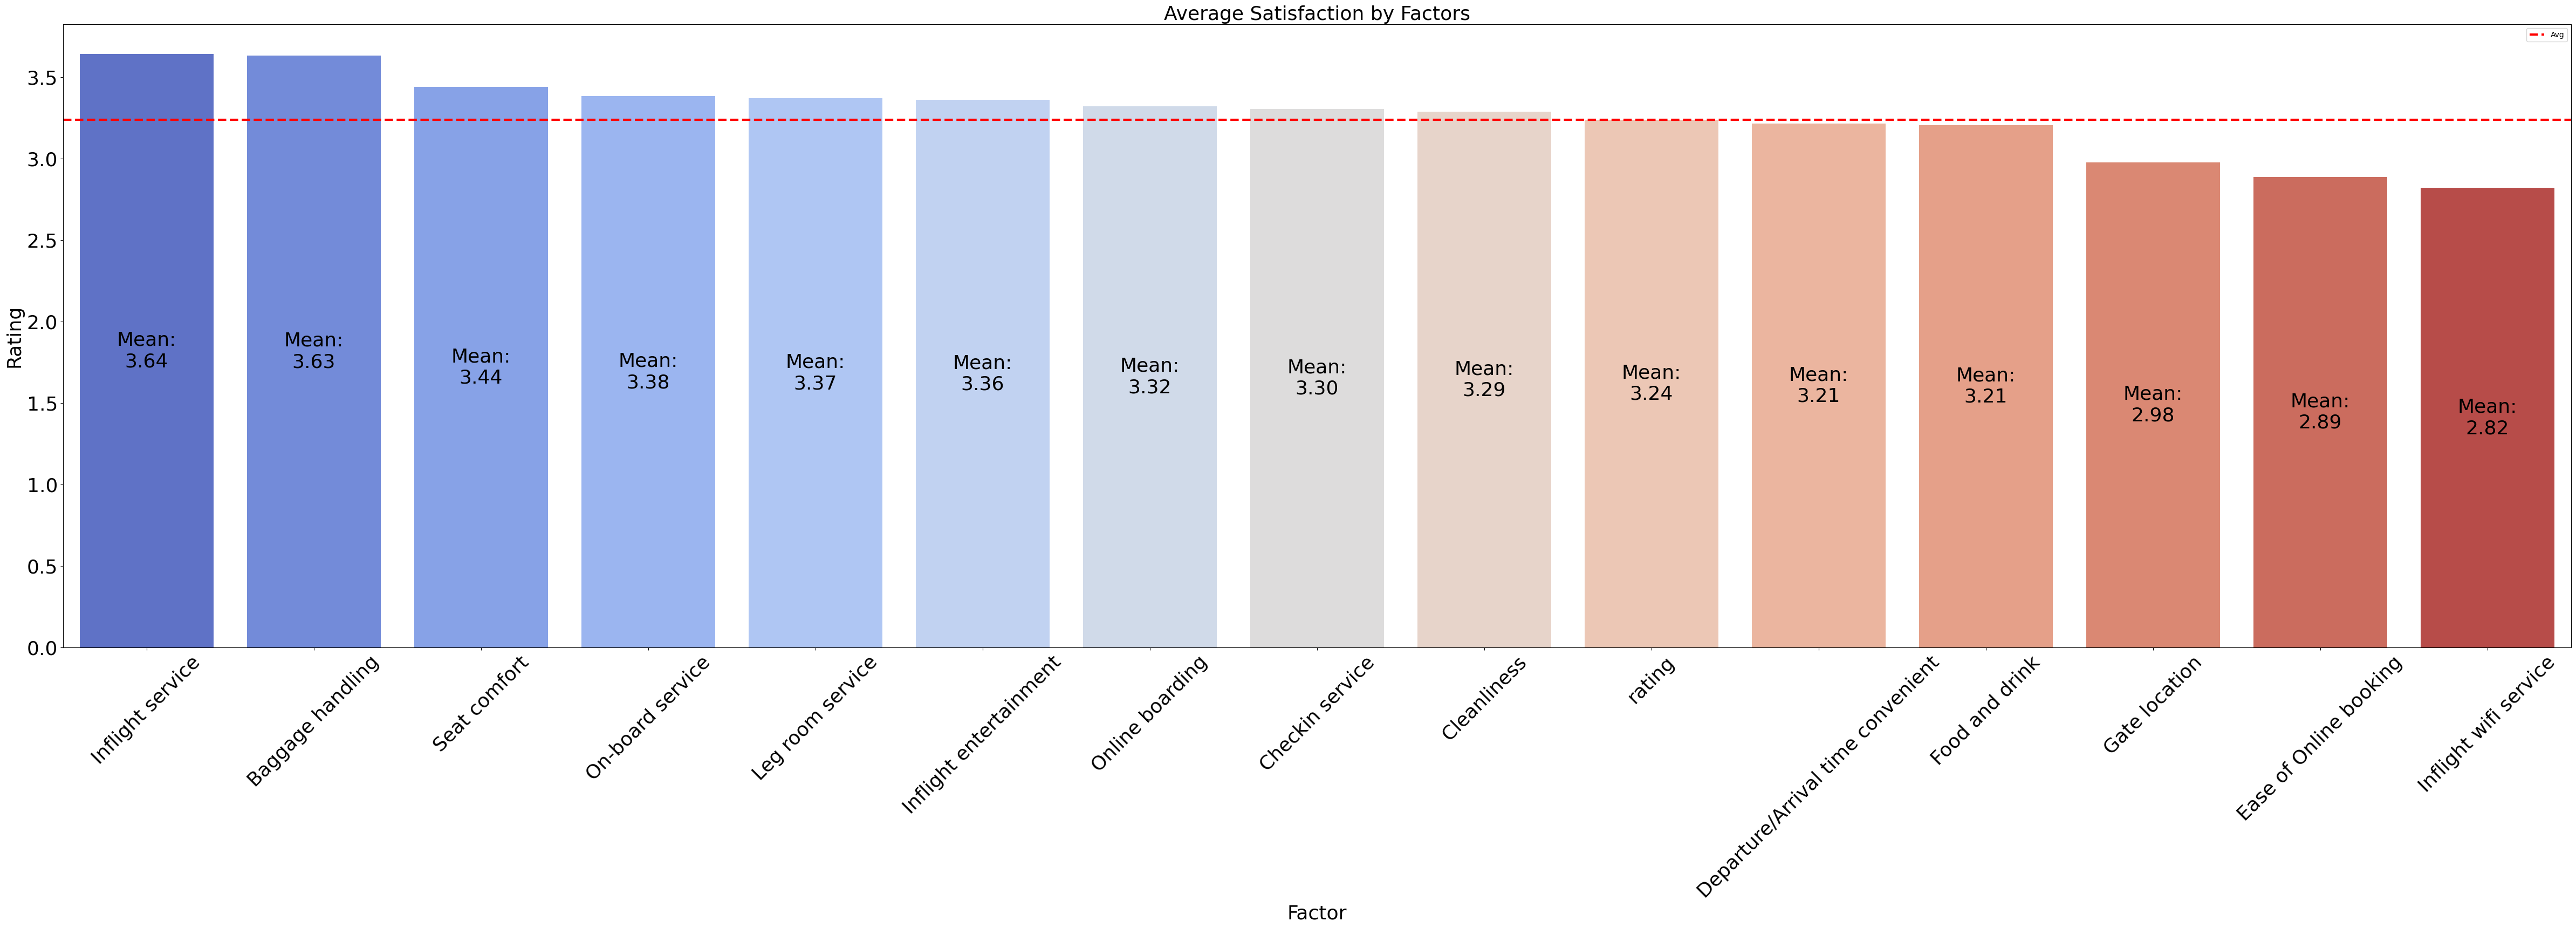

In [47]:
plt.figure(figsize=(60,15))


ax = sns.barplot(data=df_average,x= 'index',y= 0,palette='coolwarm')
ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center',fontsize=26)
plt.axhline(y=df_average.iloc[9,1], color='red', linestyle='--', linewidth=3, label='Avg')


plt.title('Average Satisfaction by Factors',fontsize=26)
plt.ylabel('Rating',fontsize=26)
plt.yticks(fontsize=26)
plt.xlabel('Factor',fontsize=26)
plt.xticks(fontsize=26,rotation=45)
plt.legend()
plt.show();

**Highlights:**

- Inflight services along with Baggage Handling are top two score. This means that our company provides excellent on-flight experience

- Inflight wifi service and ease of online booking are bottom two score. This means that passengers experienced difficulty buying tickets online and terrible wifi experience. Ease of online booking is of priority since this directly affect ticket sales.

- Factors that scored above average are Inflight Service, Baggage Handling, Seat Comfort, On-board Service, Leg Room Service, Inflight Entertainment, Online Boarding, Check-in Service, and Cleanliness

- Factors that scored below average are Departure/Arrival Time Convinience, Food and Drink, Gate Location, Ease of Online Boarding, and Inflight Wifi Service.

# Conclusion

## Data Cleaning

- There are 24 columns and 10,3904 rows. But there are 310 Missing Values in Arrival Delay in Minutes
- We filled the missing values based on Departure Delay in Minutes since the two variable is strongly correlated
- Replaced the 0 value in all passenger's satisfaction variable since it would not make sense. 0 is replaced by each factor's median, since none of the factor is normally distributed.
- Created the rating column, which is the average of all passenger's satisfaction score

## Exploratory Data Analysis

- Only 43.3% of our passengers were satisfied using our service
- 81.7% of data are loyal customers, but 52.2% of them scored neutral or dissatisfied
- 69% of our passengers travel due to business reasons
- Most of satisfied passengers flew business class. There is high number of dissatisfied passengers in Eco Pluss and Eco Class.

- 54.3% of our flights were delayed
- average delay is 30.05 min. With 14.82 min during departure and 15.24 min in arrival schedule

## Satisfaction Factors

- There are strong correlations between some variables, these are: Inflight wifi service - ease of online booking, Cleanliness - food and drink, inflight entertainment - food and drink, seat comfort - inflight entertainment, seat comfort - cleanliness, baggage handling - inflight service.

- There are no statistically significant difference between satisfied and dissatisfied passengers in Departure/Arrival time convenient, Gate location, Departure Delay in Minutes and Arrival Delay in Minutes.
- All other factors were found proof of statistically significant difference. Which means these the satisfied and dissatisfied passengers received different treatment/experience
- Passengers rated excellent in inflight service, and Baggage handling
- Passengers rated terrible experience in inflight wifi service, ease of online booking, and gate location


# Recommendation

**What factors are important to customer satisfaction?**
- From correlation test, factors that has strong correlation with ratings are Inflight entertainment. Moderate correlation with inflight wifi service, online boarding, seat comfort, on-board service, baggage handling, and inflight service.

- From chi square test, satisfaction is dependent on all of factors. We can conclude all factors are relevant and important.

- Further causal analysis is required to gain more insight.

**What factors our company is good at?**
- We provided excellent service at inflight service, and baggage handling. satisfactory at seat comfort, onboard service, leg room ervice, inflight entertainment, online boarding, checkin service and cleanliness. In short, our strength lies at on-flight service and treatment.

- High customers loyalty

**What factors our company is terrible at?**

- We are terrible at inflight wifi service. Perhaps the internet is slow or keep disconnecting or very limited bandwidth. We can prioritize providing this service to business class or with extra charge if we're not ready to provide for the entire airplane.

- Ease of online booking. This is concerning since prospective passengers can go with competitors due to terrible experience. Developing straight and understandable UI/UX are very important.

- delays happen to 54.3% of our flights. The United States Federal Aviation Administration (FAA) considers a flight to be delayed when it is 15 minutes later than its scheduled time. Our departures delay averaged at 14.82 minutes, this is cutting way too close and still has variations that would violate the stated rule. Developing stricter SOP may be crucial to mitigate this.

- There are cases where passengers received different treatment. Mann-whitney test proved there are singnificant difference between dissatisfied and satisfied passengers. It may mean we do not provide same or standardized service to all of our flights. Developing Developing stricter SOP may be crucial to mitigate this.

- Many loyal customers rated neutral or dissatisfied. We could lose future revenue since they may decided to fly with competitors. Offering special discounts or amenities may help them using our service again.

- Eco plus class passengers are very low. Further investigation may be necessary to retain or expand this class.

- Majority of passengers because of personal reasons are dissatisfied. Review is needed to check if we are not providing services towards families/babies/kids.

- Big disparity in satisfied and dissatisfied passengers at eco plus and eco class. Review is needed if we are not providing crucial service

- Providing specialized service for personal and business can help increase satisfaction rating to mitigate high disparity of satisfaction for personal and business travel type. Food and drinks quality is also proposed.

- We can target satisfied disloyal customers our loyalty program or flier miles to convince them to loyal customers.

In [48]:
# df.to_csv('airline_satisfaction_cleaned.csv', index=False)


In [49]:
df.to_excel('airline_satisfaction_cleaned.xlsx', index=False)
